In [1]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [31]:
from matplotlib.image import imread
img4_1 = imread('./picture/p4_1.png')

エキゾチック・オプション...通常のバニラ・オプション（プレーン・バニラ）に様々な条件を加味した特殊なオプションをいう。投資家のニーズや投資銀行の利益目標に合わせて多種多様なものが開発されている。単体の取引の他、仕組み債の構成要素に使われていることもある。$\\$
エキゾチック・オプションに追加される条件は、大きく分けると、ある価格に達すると有効になる「ノックイン条項」と、ある価格に達すると無効になる「ノックアウト条項」がある。また、満期日に特定の条件を満たすと定められたペイオフになる「デジタル・オプション」もある。

バイナリー・オプション...デジタル・オプションの1つで、不連続なペイオフを持つ。$\\$

①キャッシュ・オア・ナッシング・コール（Cash-or-nothing call）...満期時に原資産価格$S_T$が行使価格$K$以上になると、あらかじめ定められた金額$X$が支払われるが、下回ると何も支払われない。
$$\text{Payoff}=\left\{
\begin{array}{ll}
X & \text{if}\ \ S_T\geq K \\
0 & \text{if}\ \ S_T<K
\end{array}
\right.$$
②アセット・オア・ナッシング・コール（Asset-or-nothing call）...満期時に原資産価格$S_T$が行使価格$K$以上になると、資産価格$S_T$が支払われるが、下回ると何も支払われない。
$$\text{Payoff}=\left\{
\begin{array}{ll}
S_T & \text{if}\ \ S_T\geq K \\
0 & \text{if}\ \ S_T<K
\end{array}
\right.$$

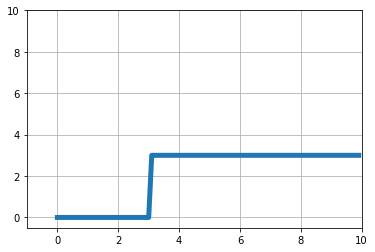

In [7]:
# キャッシュ・オア・ナッシング・コール
s = np.arange(0, 10, 0.1)
K = 3
x = 3

p = 3 * (s > K)

# グラフの設定
plt.plot(s, p, lw=5) # プロット
plt.xlim(-1, 10)  # x軸の範囲
plt.ylim(-0.5, 10) # y軸の範囲
plt.grid() # グリッド描画
plt.show() # グラフを出力

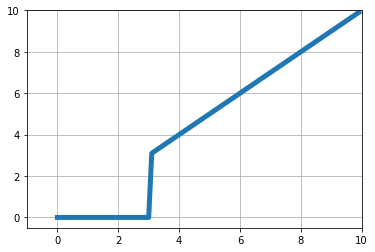

In [8]:
# アセット・オア・ナッシング・コール
s = np.arange(0, 10, 0.1)
K = 3

p = s * (s > K)

# グラフの設定
plt.plot(s, p, lw=5) # プロット
plt.xlim(-1, 10)  # x軸の範囲
plt.ylim(-0.5, 10) # y軸の範囲
plt.grid() # グリッド描画
plt.show() # グラフを出力

キャッシュ・オア・ナッシング・コールの解析解は
$$Call(X,K,r,t,T,\sigma)=Xe^{-rt}N(d_2)$$
ただし、
$$d_2=\cfrac{\ln(S_0/K)+(r-\sigma^2/2)T}{\sigma\sqrt{T}}$$

In [168]:
# キャッシュ・オア・ナッシング・コールの解析解を用いたオプション価格
class Cash_Or_Nothing:
    def __init__(self, s0, X, K, r, t, T, sigma):
        self.s0 = s0
        self.X =X
        self.K = K
        self.r = r
        self.t = t
        self.T = T
        self.sigma = sigma

    def Call(self, s0, X, K, r, t, T, sigma):
        self.s0 = s0
        self.X = X
        self.K = K
        self.r = r
        self.t = t
        self.T = T
        self.sigma = sigma

        d1 = (np.log(s0/K)+(r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        call = X * np.exp(-r*t) * stats.norm.cdf(d2,0,1)
        return call


In [169]:
# キャッシュ・オア・ナッシング・コールのモンテカルロ法
class Cash_Or_Nothing_Monte_Carlo:
    def __init__(self, s0, X, mu, sigma, dt, N):
        self.s0 = s0
        self.X = X
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.N = N
    
    def Price(self, s0, mu, sigma, dt):
        eps = np.random.normal(0,1,1)
        s = s0 * np.exp((mu - (sigma**2) / 2 ) * dt + sigma * eps * np.sqrt(dt))
        return s
    
    def MC_Call(self, s0, X, K, r, t, T, mu, sigma, dt, N):
        Payoff = 0
        for i in range(N):
            s = self.Price(s0, mu, sigma, dt)

            if s > K:
                dPayoff = X
                Payoff = Payoff + dPayoff

        mean_Payoff = Payoff / N
        MC_call = mean_Payoff * np.exp(-r * t)
        return MC_call

In [172]:
s0 = 100
X = 2.5
K = 100
r = 0.05
T = 0.5
t = T
mu = r
sigma = 0.3
n = 1
dt = T/n
N =100000

CON = Cash_Or_Nothing(s0, X, K, r, t, T, sigma)
CON_MC = Cash_Or_Nothing_Monte_Carlo(s0, X, mu, sigma, dt, N)

C = CON.Call(s0, X, K, r, t, T, sigma)
MC = CON_MC.MC_Call(s0, X, K, r, t, T, mu, sigma, dt, N)

print(f'解析解_Call = {C}')
print(f'MC_Call = {MC}')


解析解_Call = 1.2306008682827019
MC_Call = 1.2288417236600975


（注）コール価格が通常のコール価格に比べて低いが、これは通常のヨーロピアンコールのペイオフが株価と共に大きくなっていき、その期待平均値が固定ペイオフの2.5よりずっと大きいことを表している。（X≒29.58で通常のコール価格とほぼ同じになる。）

In [112]:
s0 = 100
X = 29.58
K = 100
r = 0.05
T = 0.5
sigma = 0.3
n = 1
dt = T/n
N =100000

CON = Cash_Or_Nothing(s0, X, K, r, T, sigma)
CON_MC = Cash_Or_Nothing_Monte_Carlo(s0, X, sigma, dt, N)

C = CON.Call(s0, X, K, r, T, sigma)
MC = CON_MC.MC_Call(s0, X, K, r, T, sigma, dt, N)

print(f'解析解_Call = {C}')
print(f'MC_Call = {MC}')


解析解_Call = 14.560469473520927
MC_Call = 14.517729527280434


ルックバック・オプション...オプションの満期時に、それまでの資産価格の経路に依存してペイオフが決まる。（資産価格が達した最大値または最小値に依存する。）$\\$

①変動ルックバック・コールのペイオフ：$\max(S_T-S_{min},0)$, 変動ルックバック・プットのペイオフ：$\max(S_{max}-S_T,0)$ $\\$
②固定ルックバック・コールのペイオフ：$\max(S_{max}-K,0)$, 固定ルックバック・プットのペイオフ：$\max(K-S_{min},0)$

無配当株式を原資産とする変動ルックバック・コールの解析解は
$$Call(S_0,S_{min},K,r,T,\sigma)=S_0N(a_1)-S_0\cfrac{\sigma^2}{2r}N(-a_1)-S_{min}e^{-rT}\left(N(a_2)-\cfrac{\sigma^2}{2r}e^{Y_1}N(-a_3)\right)$$
ただし、
$$a_1=\cfrac{\ln(S_0/S_{min})+(r+\sigma^2/2)T}{\sigma\sqrt{T}},$$
$$a_2=a_1-\sigma\sqrt{T},$$
$$a_3=\cfrac{\ln(S_0/S_{min})+(-r+\sigma^2/2)T}{\sigma\sqrt{T}},$$
$$Y_1=\cfrac{-2(r-\sigma^2/2)\ln(S_0/S_{min})}{\sigma^2}$$

In [158]:
# 無配当株式を原資産とする変動ルックバック・コールの解析解を用いたオプション価格
class Lookback:
    def __init__(self, s0, smin, K, r, T, sigma):
        self.s0 = s0
        self.smin = smin
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma

    def Call(self, s0, smin, K, r, T, sigma):
        self.s0 = s0
        self.smin = smin
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma

        a1 = (np.log(s0/smin)+(r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
        a2 = a1 - sigma * np.sqrt(T)
        a3 = (np.log(s0/smin)+(-r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
        Y1 = (-2 * (r - sigma**2/2) * np.log(s0/smin)) / (sigma**2)
        call = s0 * stats.norm.cdf(a1,0,1) - s0 * (sigma**2/(2*r)) * stats.norm.cdf(-a1,0,1) - \
        smin * np.exp(-r*T) * (stats.norm.cdf(a2,0,1) - sigma**2/(2*r) * np.exp(Y1) * stats.norm.cdf(-a3,0,1))
        return call


In [163]:
# 変動ルックバック・コールのモンテカルロ法
class Lookback_Monte_Carlo:
    def __init__(self, s0, smin, mu, sigma, T, tstep, N):
        self.s0 = s0
        self.smin = smin
        self.mu = mu
        self.sigma = sigma
        self.T = T
        self.tstep = tstep
        self.N = N
    
    def Price(self, s0, mu, sigma, dt):
        eps = np.random.normal(0,1,1)
        s = s0 * np.exp((mu - (sigma**2) / 2 ) * dt + sigma * eps * np.sqrt(dt))
        return s
    
    def MC_Call(self, s0, smin, K, r, T, tstep, mu, sigma, dt, N):
        Payoff = 0
        calc_err_buffer = tstep / 100
        for i in range(N):
            st = s0
            stmin = smin
            t = tstep
            while t <= T + calc_err_buffer:
                st = self.Price(st, mu, sigma, tstep)
                t = t + tstep
                if st < stmin:
                    stmin = st
            dPayoff = max(st-stmin, 0)
            Payoff = Payoff + dPayoff

        mean_Payoff = Payoff / N
        MC_call = mean_Payoff * np.exp(-r * T)
        return MC_call

In [165]:
s0 = 100
smin = 100
K = 100
r = 0.05
T = 0.5
tstep = 0.001
mu = r
sigma = 0.3
n = 1
dt = T/n
N =10000

LB = Lookback(s0, smin, K, r, T, sigma)
LB_MC = Lookback_Monte_Carlo(s0, smin, mu, sigma, T, tstep, N)

C = LB.Call(s0, smin, K, r, T, sigma)
MC = LB_MC.MC_Call(s0, smin, K, r, T, tstep, mu, sigma, tstep, N)

print(f'解析解_Call = {C}')
print(f'MC_Call = {MC}')


解析解_Call = 16.90952811040798
MC_Call = [16.57902571]


（注）最終株価までの経路をサンプルごとにシミュレートして、最小株価を判別し、ペイオフを計算している。このような経路依存型のアルゴリズムを用いると、幅広い複雑なオプションが評価できる。一方で、計算時間はバイナリー・オプションと比べて長く、サンプル数と分割数のトレードオフ関係を適当にする必要がある。

バリア・オプション...原資産価格$S_t$が、定められた期間内にあるレベルに達したかどうかでペイオフが変わるオプション。（仕組債にもよく組み込まれる。）$\\$

（1）ノックアウト・オプション...原資産価格があるレベル（バリア）に達すると消滅する。$\\$
（2）ノックイン・オプション...原資産価格があるレベル（バリア）に達すると出現する。$\\$

①ダウン・アンド・アウト・コール...下限バリアに達すると消滅するコール・オプション$\\$
②ダウン・アンド・イン・コール...下限バリアに達すると有効になるコール・オプション$\\$
③アップ・アンド・アウト・コール...上限バリアに達すると消滅するコール・オプション$\\$
④アップ・アンド・イン・コール...上限バリアに達すると有効になるコール・オプション

無配当株式を原資産とするダウン・アンド・アウト・コールの解析解は
$$Call(S_0,K,r,t,T,\sigma,c_{BS},B)=c_{BS}-S_0(B/S_0)^{2\lambda}N(d_3)+Ke^{-rt}(B/S_0)^{2\lambda-2}N(d_3-\sigma\sqrt{T})$$
ただし、
$$\lambda=\cfrac{r+\sigma^2/2}{\sigma^2},$$
$$d_3=\cfrac{\ln[B^2/(S_0K)]}{\sigma\sqrt{T}}+\lambda\sigma\sqrt{T}$$
また、$c_{BS}$はBSモデルのコール価格、$B$は下限バリア。

In [173]:
# （復習）BSモデルの解析解を用いたオプション価格
class BS_Model:
    def __init__(self, s0, K, r, T, sigma):
        self.s0 = s0
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma

    def Call(self, s0, K, r, T, sigma):
        self.s0 = s0
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma

        d1 = (np.log(s0/K)+(r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        call = s0 * stats.norm.cdf(d1,0,1) - K * np.exp(-r*T) * stats.norm.cdf(d2,0,1)
        return call

In [177]:
# 無配当株式を原資産とするダウン・アンド・アウト・コールの解析解を用いたオプション価格
class Down_and_Out:
    def __init__(self, s0, K, r, t, T, sigma, B):
        self.s0 = s0
        self.K = K
        self.r = r
        self.t = t
        self.T = T
        self.sigma = sigma
        self.B = B

    def Call(self, s0, K, r, t, T, sigma, B):
        self.s0 = s0
        self.K = K
        self.r = r
        self.t = t
        self.T = T
        self.sigma = sigma
        self.B = B

        lmd = (r + sigma**2 / 2) / (sigma**2)
        d3 = np.log(B**2 / (s0*K)) / (sigma * np.sqrt(T)) + lmd * sigma * np.sqrt(T)
        BS = BS_Model(s0, K, r, t, sigma)
        cBS = BS.Call(s0, K, r, t, sigma)
        call = cBS - s0 * (B/s0)**(2*lmd) * stats.norm.cdf(d3,0,1) \
            + K * np.exp(-r*t) * (B/s0)**(2*lmd-2) * stats.norm.cdf(d3-sigma*np.sqrt(T),0,1)
        return call


In [186]:
# ダウン・アンド・アウト・コールのモンテカルロ法
class Down_and_Out_Monte_Carlo:
    def __init__(self, s0, mu, sigma, B, T, tstep, N):
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma
        self.B = B
        self.T = T
        self.tstep = tstep
        self.N = N
    
    def Price(self, s0, mu, sigma, dt):
        eps = np.random.normal(0,1,1)
        s = s0 * np.exp((mu - (sigma**2) / 2 ) * dt + sigma * eps * np.sqrt(dt))
        return s
    
    def MC_Call(self, s0, K, r, T, tstep, mu, sigma, B, dt, N):
        Payoff = 0
        exting = 0
        calc_err_buffer = tstep / 100
        for i in range(N):
            t = 0
            st = s0
            maturity_flag = 0
            exting_flag = 0

            while True:
                if st <= B:
                    exting_flag = 1
                else:
                    t = t + tstep

                if t <= T + calc_err_buffer:
                    st = self.Price(st, mu, sigma, tstep)
                else:
                    maturity_flag = 1
                
                if exting_flag or maturity_flag:
                    break

            if exting_flag:
                exting = exting + 1
            else:
                dPayoff = max(st-K, 0)
                Payoff = Payoff + dPayoff

        mean_Payoff = Payoff / N
        MC_call = mean_Payoff * np.exp(-r * t)
        exting_rate = exting / N
        return MC_call, exting_rate

In [190]:
s0 = 100
K = 100
r = 0.05
T = 0.5
t = T
tstep = 0.001
mu = r
sigma = 0.3
B = 80
n = 1
dt = T/n
N =10000

DO = Down_and_Out(s0, K, r, t, T, sigma, B)
DO_MC = Down_and_Out_Monte_Carlo(s0, mu, sigma, B, T, tstep, N)

C = DO.Call(s0, K, r, t, T, sigma, B)
MC = DO_MC.MC_Call(s0, K, r, T, tstep, mu, sigma, B, dt, N)

print(f'解析解_Call = {C}')
print(f'MC_Call = {MC[0]}')
print(f'消滅率 = {MC[1]}')

解析解_Call = 9.491386635636232
MC_Call = [9.60217918]
消滅率 = 0.2765


（注）事業の拡大や撤退といった経営上の意思決定は、売上高や利益などをもとにして行われる。これらをリアル・オプションとしてモデル化する場合、拡大はノックイン、撤退はノックアウトと考えることができる。ここで計算した期待消滅率はリスク中立に基づいたものであるため、実際の原資産（期待リターン15%の株式）に合わせると、消滅率は下がる。（無裁定取引でなくなるので意味もなくなる）

In [191]:
s0 = 100
K = 100
r = 0.05
T = 0.5
t = T
tstep = 0.001
mu = 0.15 # 実際の原資産（株式）の期待リターン
sigma = 0.3
B = 80
n = 1
dt = T/n
N =10000

# DO = Down_and_Out(s0, K, r, t, T, sigma, B)
DO_MC = Down_and_Out_Monte_Carlo(s0, mu, sigma, B, T, tstep, N)

# C = DO.Call(s0, K, r, t, T, sigma, B)
MC = DO_MC.MC_Call(s0, K, r, T, tstep, mu, sigma, B, dt, N)

# print(f'解析解_Call = {C}')
print(f'MC_Call = {MC[0]}')
print(f'消滅率 = {MC[1]}')

MC_Call = [12.87380346]
消滅率 = 0.2116


アジアン・オプション（平均オプション）...ペイオフが、定められた期間内の原資産の平均価格に依存するオプション。原資産価格が平均価格になるものと、行使価格が平均価格になるものの2種類がある。（ある期間内の平均価格に依るので、これも経路依存型オプションである。）$\\$

①アベレージ・プライス・コールのペイオフ：$\max(S_{\text{mean}}-K,0)$.$\\$
②アベレージ・プライス・プットのペイオフ：$\max(K-S_{\text{mean}},0)$.$\\$
③アベレージ・ストライク・コールのペイオフ：$\max(S_T-S_{\text{mean}},0)$.$\\$
④アベレージ・ストライク・プットのペイオフ：$\max(S_{\text{mean}}-S_T,0)$.$\\$

（注）アジアン・オプションの解析解は無い

In [192]:
# アベレージ・ストライク・コールのモンテカルロ法
class Asian_Monte_Carlo:
    def __init__(self, s0, mu, sigma, mstart, mend, T, tstep, N):
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma
        self.mstart = mstart
        self.mend = mend
        self.T = T
        self.tstep = tstep
        self.N = N
    
    def Price(self, s0, mu, sigma, dt):
        eps = np.random.normal(0,1,1)
        s = s0 * np.exp((mu - (sigma**2) / 2 ) * dt + sigma * eps * np.sqrt(dt))
        return s
    
    def MC_Call(self, s0, K, r, T, tstep, mu, sigma, mstart, mend, dt, N):
        Payoff = 0
        mK = 0
        calc_err_buffer = tstep / 100
        for i in range(N):
            st = s0
            ms = 0
            pnum = 0
            t = 0
            maturity_flag = 0

            while True:
                if t >= mstart and t <= mend:
                    ms = ms + st
                    pnum = pnum + 1
                t = t + tstep

                if t <= T + calc_err_buffer:
                    st = self.Price(st, mu, sigma, tstep)
                else:
                    maturity_flag = 1
                
                if maturity_flag:
                    break

            ms = ms / pnum
            dPayoff = max(st-ms, 0)
            Payoff = Payoff + dPayoff
            mK = mK + ms

        mean_Payoff = Payoff / N
        MC_call = mean_Payoff * np.exp(-r * t)
        mK = mK / N
        return MC_call, mK

In [193]:
s0 = 100
K = 100
r = 0.05
T = 0.5
t = T
tstep = 0.001
mu = r
sigma = 0.3
mstart = 0.3
mend = 0.5
n = 1
dt = T/n
N =10000

Asia_MC = Asian_Monte_Carlo(s0, mu, sigma, mstart, mend, T, tstep, N)
MC = Asia_MC.MC_Call(s0, K, r, T, tstep, mu, sigma, mstart, mend, dt, N)

print(f'MC_Call = {MC[0]}')
print(f'mean_K = {MC[1]}')

MC_Call = [3.40718916]
mean_K = [102.07810205]
